In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams["figure.figsize"]=10,6

In [2]:
dataset=pd.read_csv("D:/Data Science/Symbiosis/Time Series/International Airline Passenger Forecasting using ARIMA and AR Model/airline-passengers.csv")

In [3]:
#parse string to datetime type
dataset["Month"]=pd.to_datetime(dataset["Month"],infer_datetime_format=True)
indexedDataset=dataset.set_index(["Month"])

In [4]:
from datetime import datetime
indexedDataset.head(5)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Exploring the Dataset

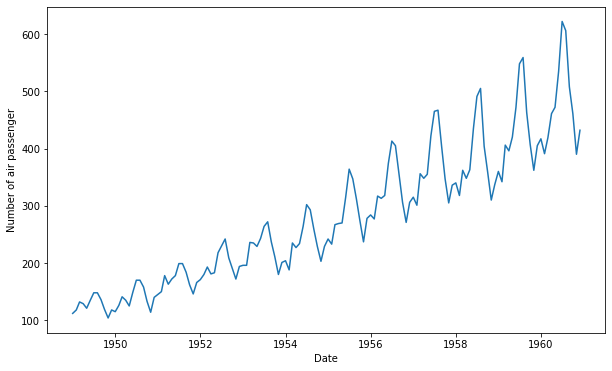

In [5]:
#Plot the graph
plt.xlabel("Date")
plt.ylabel("Number of air passenger")
plt.plot(indexedDataset)

In [6]:
#determining rolling statistics
rollmean=indexedDataset.rolling(window=12).mean()
rollstd=indexedDataset.rolling(window=12).std()
(rollmean.head(20),rollstd.head(20))

(            Passengers
 Month                 
 1949-01-01         NaN
 1949-02-01         NaN
 1949-03-01         NaN
 1949-04-01         NaN
 1949-05-01         NaN
 1949-06-01         NaN
 1949-07-01         NaN
 1949-08-01         NaN
 1949-09-01         NaN
 1949-10-01         NaN
 1949-11-01         NaN
 1949-12-01  126.666667
 1950-01-01  126.916667
 1950-02-01  127.583333
 1950-03-01  128.333333
 1950-04-01  128.833333
 1950-05-01  129.166667
 1950-06-01  130.333333
 1950-07-01  132.166667
 1950-08-01  134.000000,
             Passengers
 Month                 
 1949-01-01         NaN
 1949-02-01         NaN
 1949-03-01         NaN
 1949-04-01         NaN
 1949-05-01         NaN
 1949-06-01         NaN
 1949-07-01         NaN
 1949-08-01         NaN
 1949-09-01         NaN
 1949-10-01         NaN
 1949-11-01         NaN
 1949-12-01   13.720147
 1950-01-01   13.453342
 1950-02-01   13.166475
 1950-03-01   13.686977
 1950-04-01   13.822467
 1950-05-01   13.663710
 1950-06-01   1

In [7]:
indexedDataset.head(20)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


# checking stationary with rolling mean & rolling std

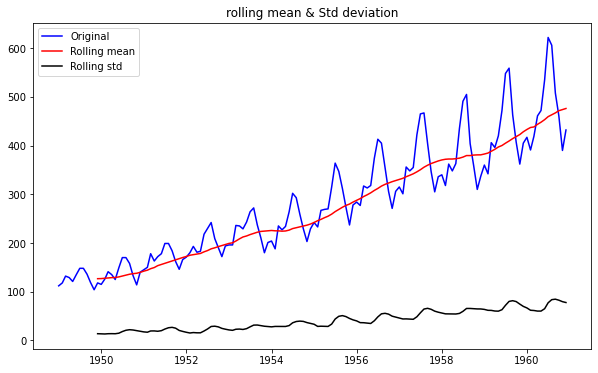

In [8]:
#plot rolling statistics
orig=plt.plot(indexedDataset,color="blue",label="Original")
mean=plt.plot(rollmean,color="red",label="Rolling mean")
std=plt.plot(rollstd,color="black",label="Rolling std")
plt.legend(loc="best")
plt.title("rolling mean & Std deviation")
plt.show(block=False)

# checking stationary with Augmendted Dickey Fuller Statistical Test

In [9]:
#perform Augmendted Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

print("Result of Dickey fuller test:")
dftest=adfuller(indexedDataset['Passengers'],autolag="AIC")

dfoutput=pd.Series(dftest[0:4],index=["Test Statistic","p-value","#Lags Used","Number of observation Used"])
for key,value in dftest[4].items():
    dfoutput["Critical Value (%s)"%key]=value
    
print (dfoutput)

Result of Dickey fuller test:
Test Statistic                  0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of observation Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


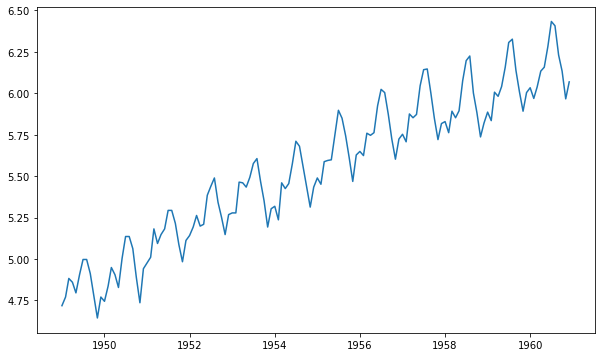

In [10]:
#Estimating trend
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

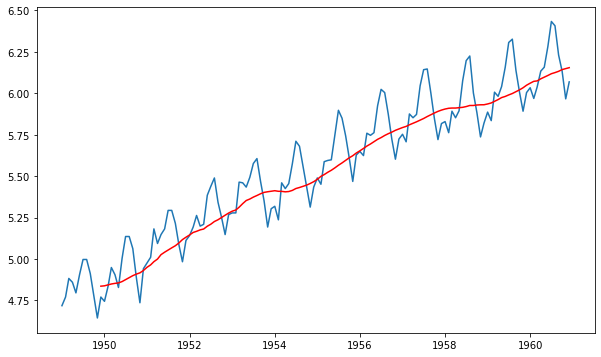

In [11]:
movingAverage=indexedDataset_logScale.rolling(window=12).mean()
movingSTD=indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color="red")

In [12]:
datasetLogScaleMinusMovingAverage=indexedDataset_logScale-movingAverage
datasetLogScaleMinusMovingAverage.head(12)


#remove Nan values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


# Wrapping visual & Statistical tool in a single function

In [13]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #determing rolling statistics
    movingAverage=timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    
    #plot rolling statistics
    orig=plt.plot(timeseries,color="blue",label="Original")
    mean=plt.plot(movingAverage,color="red",label="Rolling mean")
    std=plt.plot(movingSTD,color="black",label="Rolling std")
    plt.legend(loc="best")
    plt.title("rolling mean & Std deviation")
    plt.show(block=False)
    
    #perform Dickey Fuller Test
    print("Result of Dickey fuller test:")
    dftest=adfuller(timeseries["Passengers"],autolag="AIC")
    dfoutput=pd.Series(dftest[0:4],index=["Test Statistic","p-value","#Lags Used","Number of observation Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key]=value
    print (dfoutput)

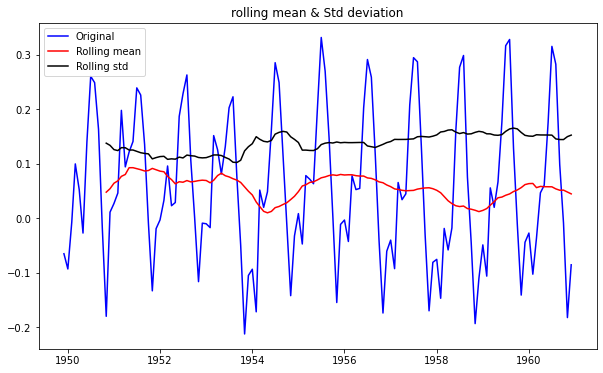

Result of Dickey fuller test:
Test Statistic                 -3.162908
p-value                         0.022235
#Lags Used                     13.000000
Number of observation Used    119.000000
Critical Value (1%)            -3.486535
Critical Value (5%)            -2.886151
Critical Value (10%)           -2.579896
dtype: float64


In [14]:
test_stationarity(datasetLogScaleMinusMovingAverage)

# Converting non stationary data to stationary
## -log
## -substracting simple rolling Avg
## -substracting exponential rolling Avg
## -substracting previous value(most popular)with shift()
## -seasonal decomposition
## -combination of the above

# 1.log

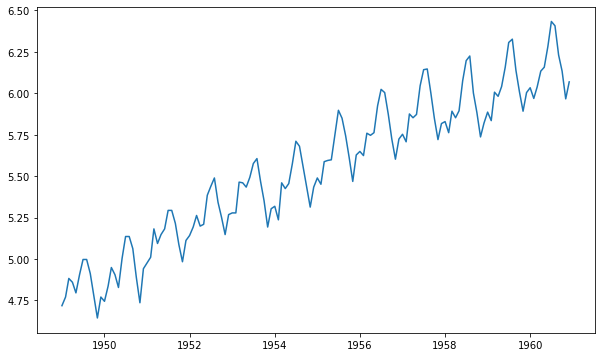

In [15]:
#Estimating trend
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

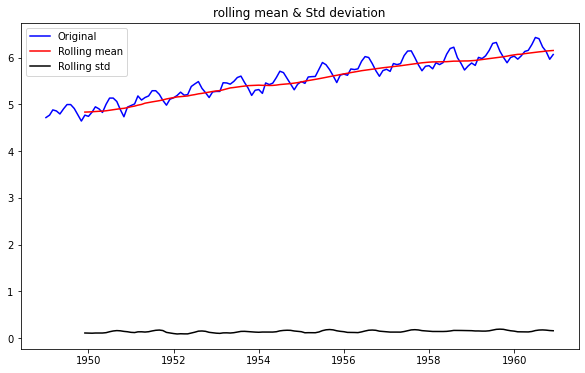

Result of Dickey fuller test:
Test Statistic                 -1.717017
p-value                         0.422367
#Lags Used                     13.000000
Number of observation Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


In [16]:
test_stationarity(indexedDataset_logScale)

# 2.Differncing Simple Moving Average

In [17]:
datasetLogScaleMinusMovingAverage=indexedDataset_logScale-movingAverage
datasetLogScaleMinusMovingAverage.head(12)


#remove Nan values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


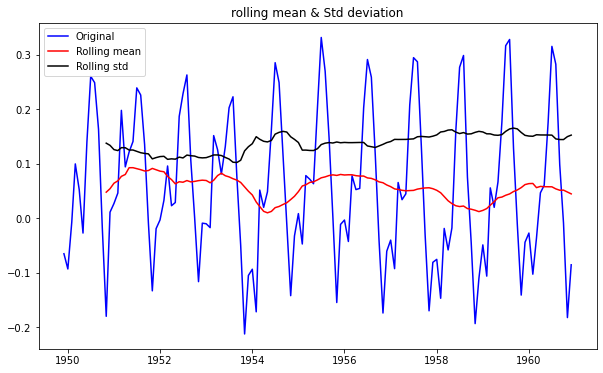

Result of Dickey fuller test:
Test Statistic                 -3.162908
p-value                         0.022235
#Lags Used                     13.000000
Number of observation Used    119.000000
Critical Value (1%)            -3.486535
Critical Value (5%)            -2.886151
Critical Value (10%)           -2.579896
dtype: float64


In [18]:
test_stationarity(datasetLogScaleMinusMovingAverage)

# 3.Differncing exponential moving average

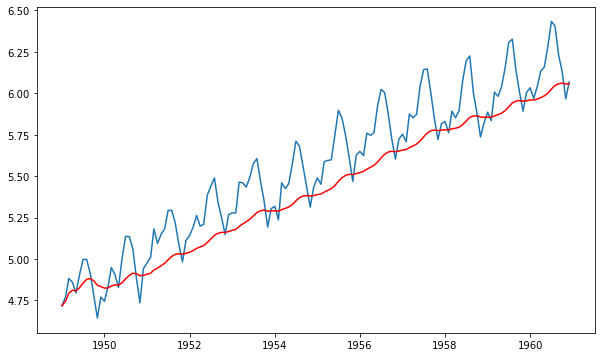

In [19]:
exponentialDecayWeightedAverage=indexedDataset_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color="red")
plt.show()

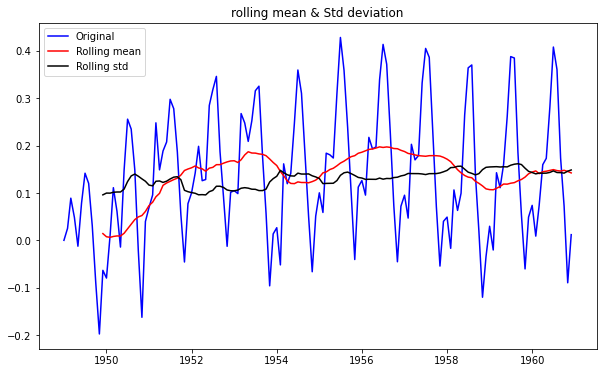

Result of Dickey fuller test:
Test Statistic                 -3.601262
p-value                         0.005737
#Lags Used                     13.000000
Number of observation Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


In [20]:
datasetLogScaleMinusMovingExponentialDecayAverage=indexedDataset_logScale-exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

# 4.Differncing Previous Value

In [21]:
indexedDataset_logScale.head()

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


In [24]:
datasetLogDiffShifting.head()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022


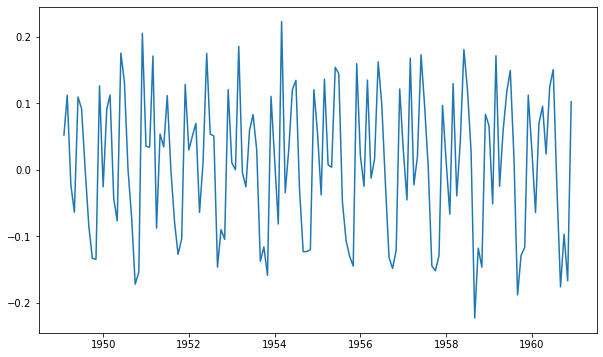

In [23]:
datasetLogDiffShifting=indexedDataset_logScale-indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)
plt.show()

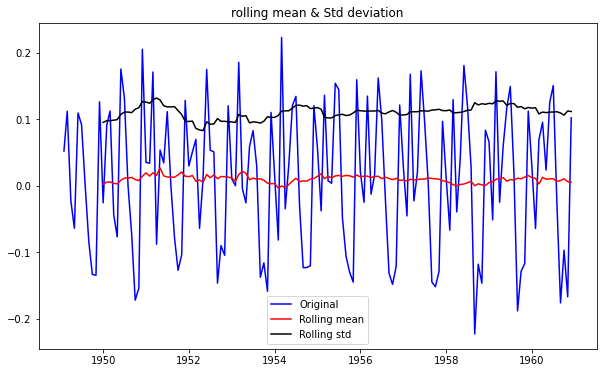

Result of Dickey fuller test:
Test Statistic                 -2.717131
p-value                         0.071121
#Lags Used                     14.000000
Number of observation Used    128.000000
Critical Value (1%)            -3.482501
Critical Value (5%)            -2.884398
Critical Value (10%)           -2.578960
dtype: float64


In [25]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

# 5.Seasonal decomposition

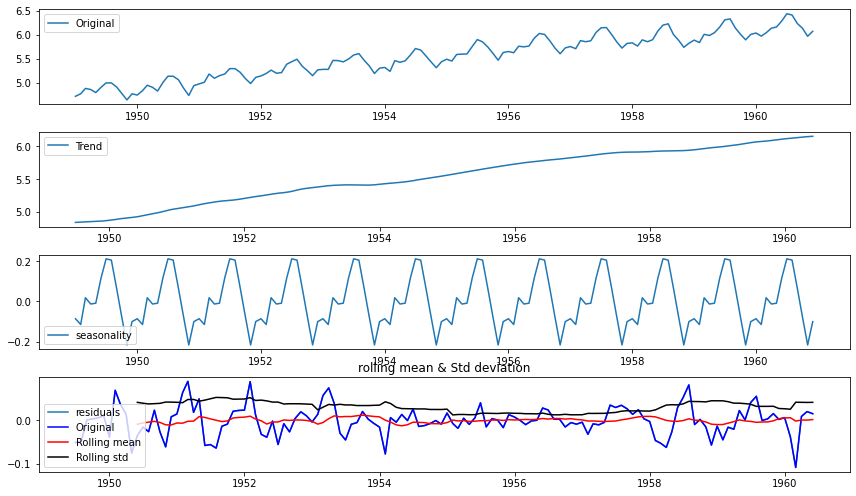

Result of Dickey fuller test:


KeyError: 'Passengers'

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(indexedDataset_logScale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.figure(figsize=(12,7))
plt.subplot(411)
plt.plot(indexedDataset_logScale,label="Original")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend,label="Trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal,label="seasonality")
plt.legend(loc="best")
plt.subplot(414)
plt.plot(residual,label="residuals")
plt.legend(loc="best")
plt.tight_layout()

decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

# Finding the lags of AR and MA models

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf,pacf

lag_acf=acf(datasetLogDiffShifting,nlags=20)
lag_pacf=pacf(datasetLogDiffShifting,nlags=20,method="ols")

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle="--",color="gray")
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle="--",color="gray")
plt.title("Autocorrelation Function")

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle="--",color="gray")
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle="--",color="gray")
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

In [ ]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [ ]:
arma_order_select_ic(datasetLogDiffShifting)

# AR model

Ploting AR Model


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

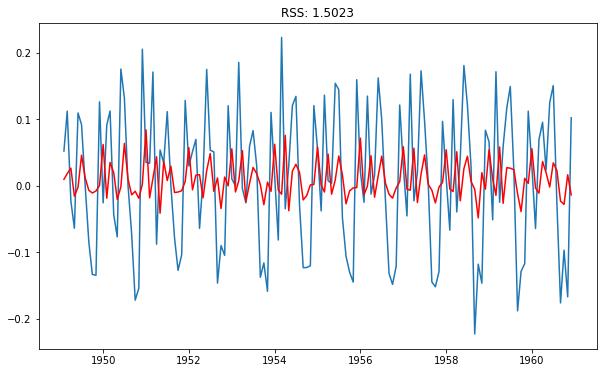

In [27]:
from statsmodels.tsa.arima_model import ARIMA
#AR MODEL
print("Ploting AR Model")
model=ARIMA(indexedDataset_logScale,order=(2,1,0))
results_AR=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color="red")
plt.title("RSS: %.4f"% sum((results_AR.fittedvalues-datasetLogDiffShifting["Passengers"])**2))
plt.show()

# MA Model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


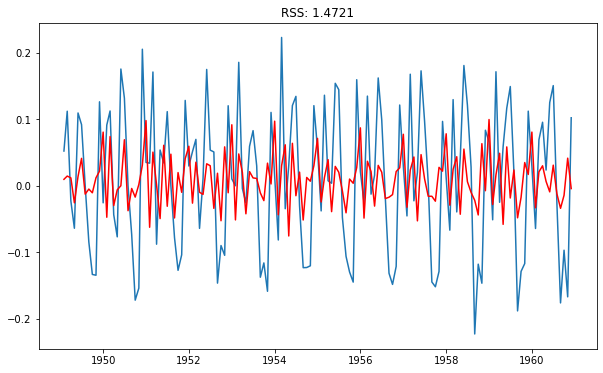

In [28]:
#MA MODEL
model=ARIMA(indexedDataset_logScale,order=(0,1,2))
results_MA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues,color="red")
plt.title("RSS: %.4f"% sum((results_MA.fittedvalues-datasetLogDiffShifting["Passengers"])**2))
plt.show()

# ARIMA Model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warn

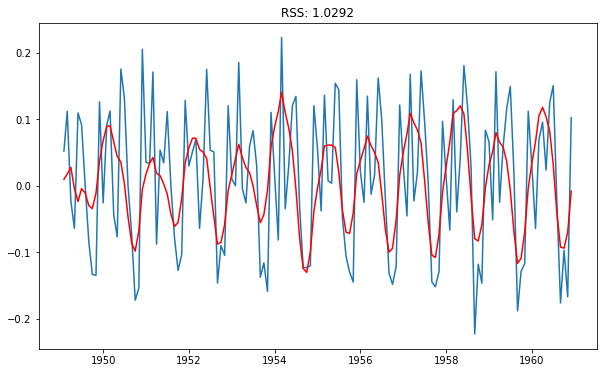

In [29]:
model=ARIMA(indexedDataset_logScale,order=(2,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color="red")
plt.title("RSS: %.4f"% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["Passengers"])**2))
plt.show()

### Getting predictions

In [30]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


#### Remember the prediction are in Log_differenced values. We need to covert them to original form

In [32]:
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [36]:
predictions_ARIMA_log=pd.Series(indexedDataset_logScale["Passengers"].iloc[0],index=indexedDataset_logScale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

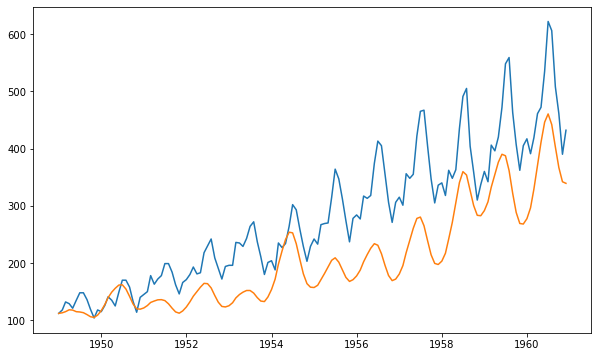

In [37]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
plt.show()

In [38]:
indexedDataset_logScale.head()

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


In [39]:
indexedDataset.shape

(144, 1)

In [40]:
#results ARIMA.plot_predict(1,264)
#plt.show()
results_ARIMA.forecast(steps=120)

(array([6.09553386, 6.1528139 , 6.2244295 , 6.29241086, 6.34164705,
        6.36359356, 6.35784688, 6.33139312, 6.29597552, 6.26447726,
        6.24738334, 6.25025174, 6.27275832, 6.30940302, 6.3515148 ,
        6.38988643, 6.41727373, 6.43011051, 6.42906692, 6.41842496,
        6.40456165, 6.39403625, 6.39183089, 6.40019505, 6.41833689,
        6.44295401, 6.46937428, 6.49293979, 6.51024115, 6.51989034,
        6.52267583, 6.52112394, 6.51864535, 6.51853697, 6.52311928,
        6.53322363, 6.54812869, 6.56591555, 6.58410306, 6.60036538,
        6.61313266, 6.62192784, 6.62737793, 6.63093135, 6.63438696,
        6.63937991, 6.6469651 , 6.65739845, 6.67015327, 6.68414253,
        6.69806628, 6.71077903, 6.72157735, 6.73033988, 6.73749817,
        6.74386385, 6.7503733 , 6.757826  , 6.76668688, 6.77699829,
        6.78841324, 6.80032858, 6.81207199, 6.82308765, 6.83307142,
        6.84202499, 6.85022319, 6.85811229, 6.86617348, 6.87479159,
        6.8841631 , 6.89426391, 6.90487896, 6.91